In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('combine_data_csv')
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...,...
545,545,12.6,21.0,0.0,1018.9,68,1.4,2.6,9.4,264.583333
546,546,13.7,21.0,5.6,1018.8,71,1.3,1.5,7.6,253.291667
547,547,13.3,19.3,5.5,1021.9,62,1.9,7.8,14.8,181.208333
548,548,14.4,21.5,5.5,1021.0,60,1.8,8.9,18.3,210.875000


In [4]:
# df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
df=df.iloc[:,1:]

In [5]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
545,12.6,21.0,0.0,1018.9,68,1.4,2.6,9.4,264.583333
546,13.7,21.0,5.6,1018.8,71,1.3,1.5,7.6,253.291667
547,13.3,19.3,5.5,1021.9,62,1.9,7.8,14.8,181.208333
548,14.4,21.5,5.5,1021.0,60,1.8,8.9,18.3,210.875000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       550 non-null    float64
 1   TM      550 non-null    float64
 2   Tm      550 non-null    float64
 3   SLP     550 non-null    float64
 4   H       550 non-null    int64  
 5   VV      550 non-null    float64
 6   V       550 non-null    float64
 7   VM      550 non-null    float64
 8   PM 2.5  549 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 38.8 KB


In [7]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [10]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,25.127140,32.006375,19.103097,1008.288889,65.295082,1.781785,6.513115,15.596903,106.773664
std,7.299843,6.997034,7.463608,7.586932,15.085655,0.600118,4.087966,7.986399,80.635473
min,6.700000,9.800000,0.000000,991.500000,21.000000,0.300000,0.400000,1.900000,0.000000
25%,18.500000,27.300000,12.000000,1001.500000,56.000000,1.400000,3.300000,11.100000,45.375000
50%,27.500000,34.000000,21.000000,1008.800000,67.000000,1.900000,6.100000,14.800000,80.708333
75%,31.000000,36.800000,25.700000,1015.000000,76.000000,2.100000,8.900000,18.300000,152.554167
max,38.500000,45.500000,32.700000,1023.200000,98.000000,3.400000,24.400000,57.600000,404.500000


In [11]:
#feature extraction

df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967862,0.965157,-0.889020,-0.524467,0.608045,0.346485,0.286482,-0.629898
TM,0.967862,1.000000,0.901475,-0.835683,-0.612395,0.605626,0.342980,0.301275,-0.573447
Tm,0.965157,0.901475,1.000000,-0.901673,-0.342549,0.555229,0.327737,0.252748,-0.665778
SLP,-0.889020,-0.835683,-0.901673,1.000000,0.308668,-0.476347,-0.361016,-0.290194,0.608924
H,-0.524467,-0.612395,-0.342549,0.308668,1.000000,-0.480948,-0.416193,-0.380964,0.217851
VV,0.608045,0.605626,0.555229,-0.476347,-0.480948,1.000000,0.443132,0.367184,-0.729767
V,0.346485,0.342980,0.327737,-0.361016,-0.416193,0.443132,1.000000,0.748162,-0.441617
VM,0.286482,0.301275,0.252748,-0.290194,-0.380964,0.367184,0.748162,1.000000,-0.350197
PM 2.5,-0.629898,-0.573447,-0.665778,0.608924,0.217851,-0.729767,-0.441617,-0.350197,1.000000


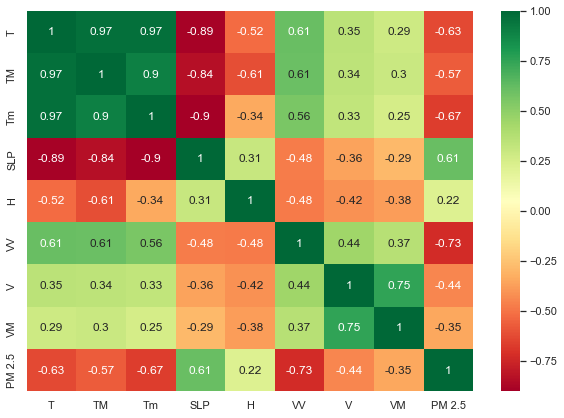

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')
plt.show()

In [13]:
# Split data

X=df.iloc[:, :-1]
y=df['PM 2.5']


In [14]:
# Feature importance using extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
model.feature_importances_

array([0.09885825, 0.08028873, 0.14719278, 0.10419607, 0.06573592,
       0.41587288, 0.04913122, 0.03872414])

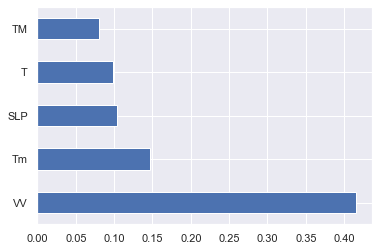

In [16]:
plt.figure(figsize = (6,4))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

read https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

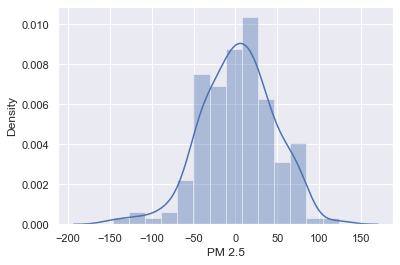

In [20]:
sns.distplot(y_pred-y_test,)

In [21]:
model.score(X_train,y_train)

0.7033904687037664

In [22]:
model.score(X_test,y_test)

0.6584547777202249

In [23]:
from sklearn import metrics

In [24]:
metrics.r2_score(y_test,y_pred)

0.6584547777202249

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 34.01310150852877
MSE: 1879.1442531931991
RMSE: 43.34909748995011


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y)
score

array([ 0.64721279,  0.65712552, -0.14694043,  0.67261744,  0.69375877])

In [27]:
model.predict(X_test)

array([ 60.52101172,  51.88711304,  84.80668893,  17.3134531 ,
       134.69751252,  95.78590816,  68.78760769,  62.62903476,
       104.58235144, 148.58929682,  77.01018074, 134.99995016,
       108.41879473,  53.40006415,  50.35860616,  66.76834739,
       102.60948607, 209.33555719,  90.59649303,  47.87894184,
        45.246828  ,  54.64540828, 124.3932631 ,  27.45860533,
        48.6943031 , 203.77749581, 184.1430943 ,  45.37604963,
       114.27236501, 195.68118613,  31.34297596, 187.40790702,
       104.18860619,  72.58870556,  37.571374  ,  47.07790582,
       195.51384653,  72.3030794 ,  96.36916351,  62.38498403,
       -25.17762189, 210.95445719,  23.54426446, 195.52618952,
        76.41438129, 167.6122566 ,  66.83211162,  96.58920011,
       196.20078088,  64.30986819,  50.47222379,  56.27409468,
        54.46792715,  76.28833778, 232.39380428,  85.45698636,
       182.3767751 ,  53.54088888, 183.39544302,  39.67123403,
       107.37539241,  57.68785003,  82.70022251, 129.46

In [28]:
model.predict([[2,4,6,4,5,7,8,2]])

array([-1595.86504694])

In [29]:
# saving the model
import joblib

joblib.dump(model, 'air_quality.pkl')

['air_quality.pkl']

# decision tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(X,y)

DecisionTreeRegressor()

In [31]:
y_pred1=model1.predict(X_test)

In [32]:
model1.score(X_train,y_train)

1.0

In [33]:
model1.score(X_test,y_test)

1.0

In [34]:
metrics.r2_score(y_test,y_pred1)

1.0

In [35]:
from sklearn.model_selection import cross_val_score
accuracy_training=cross_val_score(model1,X_train, y_train, cv=10)
accuracy_training

array([ 0.57615197,  0.52580461, -0.11681838,  0.59232942,  0.59453511,
        0.13892665,  0.66742134,  0.59240368,  0.40516453,  0.50543395])

In [36]:
from sklearn.model_selection import cross_val_score
accuracy_test=cross_val_score(model1,X_test, y_test, cv=10)
accuracy_test

array([-2.84234886, -0.38101227,  0.67044976,  0.66084515,  0.05207888,
        0.3114333 ,  0.55347643,  0.62859516,  0.4131546 ,  0.19099745])

# Random Forest


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X,y)


RandomForestRegressor()

In [38]:
y_pred2=rf_reg.predict(X_test)

In [39]:
rf_reg.score(X_train,y_train)

0.9661744197502574

In [40]:
rf_reg.score(X_test,y_test)

0.949712474048585

In [41]:
metrics.r2_score(y_test,y_pred2)

0.949712474048585

In [42]:
from sklearn.model_selection import cross_val_score
accuracy_training=cross_val_score(rf_reg,X_train, y_train, cv=15)
accuracy_test=cross_val_score(rf_reg,X_test, y_test, cv=15)

print(accuracy_training)
print('***'*20)
print(accuracy_test)

[0.71074802 0.87136404 0.63607706 0.75108979 0.75122865 0.79834795
 0.7741839  0.45588352 0.75541569 0.79662608 0.73771303 0.78189826
 0.66876026 0.63351444 0.77720406]
************************************************************
[-1.17138906  0.47650067  0.39310233  0.80580201  0.51238632  0.60269206
  0.68288724  0.71216267  0.71574896  0.56909684 -0.71771931  0.69093026
  0.70563575  0.68428589 -0.22373709]


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
n_estimators=[int(i) for i in np.linspace(100,1200,12)]
max_depth=[int(i) for i in np.linspace(5,30,6)]
max_features=["sqrt", "auto"]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [58]:
random_grid={'n_estimators': n_estimators,
     'max_depth': max_depth,
     'max_features':max_features,
     'min_samples_split':min_samples_split,
      'min_samples_leaf':min_samples_leaf
     }

In [79]:
rf_random=RandomizedSearchCV(estimator=rf_reg, param_distributions=random_grid,cv=5,n_iter=100,verbose=2,random_state=101
                             , n_jobs=1,scoring='neg_mean_squared_error')

In [80]:
rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=aut

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=s

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.0s
[CV] END max_depth=5, max_features=sq

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=3

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=15,
                                                   max_features='auto',
                                                   min_samples_leaf=5,
                                                   min_samples_split=15,
                                                   n_estimators=600),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [82]:
rf_reg=RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf=2, max_features= 'auto',
                             max_depth= 25)

rf_reg.fit(X,y)


RandomForestRegressor(max_depth=25, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000)

In [83]:
y_pred2=rf_reg.predict(X_test)

In [84]:
rf_reg.score(X_train,y_train)

0.9421422352764598

In [85]:
rf_reg.score(X_test,y_test)

0.9218487043651866

In [86]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator=rf_reg, param_distributions=random_grid,cv=5,n_iter=100,verbose=2,random_state=101
                             , n_jobs=1,scoring='neg_mean_squared_error'

In [ ]:
GridSearchCV()